In [3]:
import sqlite3
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# set style for seaborn
sns.set_style("whitegrid")
sns.set_context("paper")
#rc.use("pgf")
#rc.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')


In [4]:
# connect to database
connection = sqlite3.connect("../output/db/bulk_analysis_2019-11-08_1000ms.db")


In [5]:
# load games and moves into dataframes 
df_game_dirty = pd.read_sql("SELECT * FROM game", connection)
df_move_dirty = pd.read_sql("SELECT * FROM move", connection)

# remove games that are either too short or too long
df_game = remove_outlier(df_game_dirty, "length")
df_move = df_move_dirty[df_move_dirty["game_id"].isin(df_game["id"])]
df_move.head()


,id,fullmove_number,ply_number,turn,san,lan,score,score_change,score_change_category,move_count,...,guarded_pieces_centipawn_all,attacked_guarded_pieces_centipawn_all,unopposed_threats_centipawn_all,threats_centipawn_all,attack_defense_relation1,attack_defense_relation2,material,pawn_ending,rook_ending,game_id
0,1,1,1,1,d4,d2-d4,-10,10,0.20,20,...,5800,0,0,0,0,-600,0,0,0,1
1,2,1,2,0,g6,g7-g6,118,128,2.56,20,...,5800,0,0,0,0,-500,0,0,0,1
2,3,2,3,1,c4,c2-c4,37,81,1.62,28,...,5700,0,0,0,0,-1500,0,0,0,1
3,4,2,4,0,Bg7,Bf8-g7,106,69,1.38,21,...,5900,100,0,0,600,-2100,0,0,0,1
4,5,3,5,1,Nf3,Ng1-f3,43,63,1.26,30,...,5900,100,0,0,900,-1300,0,0,0,1


Text(0, 0.5, 'mean capture')

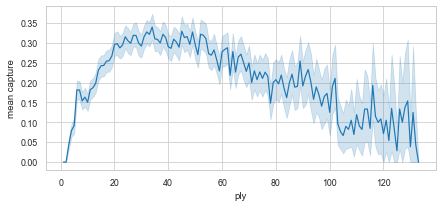

In [12]:
plt.figure(figsize=(7, 3))
line_captures = sns.lineplot(x="ply_number", y="is_capture", data=df_move_dirty.query("ply_number <= 133"))
#line_captures.set_title("")
line_captures.set_xlabel("ply")
line_captures.set_ylabel("mean capture")

In [13]:
fig = line_captures.get_figure()
fig.tight_layout()
fig.savefig("line_captures.pgf")
fig.savefig("line_captures.pdf")


In [8]:
df_move["is_capture"].head()

0    0
1    0
2    0
3    0
4    0
Name: is_capture, dtype: int64

Text(19.81562500000001, 0.5, 'mean is check')

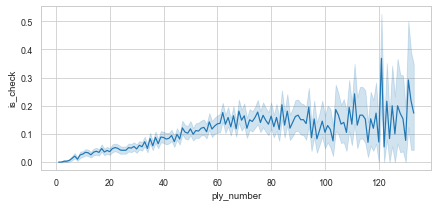

In [14]:

plt.figure(figsize=(7, 3))
line_check = sns.lineplot(x="ply_number", y="is_check", data=df_move_dirty.query("ply_number <= 133"))
line_captures.set_xlabel("ply")
line_captures.set_ylabel("mean is check")

In [16]:
fig = line_check.get_figure()
fig.tight_layout()
fig.savefig("line_check.pgf")
fig.savefig("line_check.pdf")



In [11]:
df_move["is_check"].describe()

df_game_dirty = pd.read_sql("SELECT COUNT(*) as is_check FROM game", connection)


count    59216.000000
mean         0.074017
std          0.261801
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_check, dtype: float64